# Computer Vision: Assignment 3 Part 1 - Some CNN Basics [50%]

Spring 2022 semester.

Due date: **July 1st 2022.**

## Introduction

This question is an introduction to using PyTorch for training simple neural net models. 

Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

Perform this assignment in PyTorch, modifying the baseline code, producing outputs and adding required explanations - *all within this ipython notebook*.

Finally, submit this iPython notebook, including outputs, as an .ipynb file. 

## Question (1): Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

**a)**  Use `matplotlib` and ipython notebook's visualization capabilities to display the average train and average test image of each class, for each of the two datasets.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

## Question (2): Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST. By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 10 epochs (passes through the training data). 

The cross-entropy loss function computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given target.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

**a)** Add code to plot out the network weights as images (one for each class, of size 28 by 28) after the last epoch. (Hint thread: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) )

**b)** Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Question (3): Training a Multi-Layer Network on MNIST [10%]

**a)**  Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class].

**b)**   Now retrain the model for 10 epochs with each of the learning rates in the set {0.01, 0.1, 1, 10} and test the resulting model. Create a figure and plot the loss curves of each of the four runs for comparison. Explain the obtained (train and test) results.

## Question (4): Training a Convolutional Network on CIFAR [15%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, stride 2, 16 feature maps + Tanh nonlinearity.
  - Convolution with 3 by 3 filters, (stride 1), 64 feature maps + Tanh nonlinearity.
  - Convolution with 3 by 3 filters, (stride 1), 64 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

**a)** Train it for 20 epochs on CIFAR-10 and plot the training loss curve (avg. loss per epoch) and final test loss and accuracy, when training with or without the two 3x3 convolutional layers. 

**b)**  Give a breakdown of the number of parameters (per layer) within the above model, as well as the overall number.

# **Answer (1):**
create needed blocks of code (and results) below

In [10]:
# imports
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torchvision.models as models

import torchvision
import matplotlib.pyplot as plt
import numpy as np
import math

import matplotlib
from matplotlib.ticker import MaxNLocator

In [11]:
def imshow(img1, img2, dataset, label):
    img1 = img1 / 2 + 0.5  # un-normalize
    img2 = img2 / 2 + 0.5
    np_img1, np_img2 = img1.numpy(), img2.numpy()

    plt.figure()
    plt.suptitle(dataset + " dataset average: Class " + label)
    plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(np_img1, (1, 2, 0)))
    plt.title('Train')
    plt.subplot(1, 2, 2)
    plt.imshow(np.transpose(np_img2, (1, 2, 0)))
    plt.title('Test')
    plt.show()

In [12]:
def show_average_images(train_loader, test_loader, dataset, labels):
    '''Plots the average image for each class in the dataset both for the training data and the test one'''
    
    train_counters, test_counters = [], []
    train_results, test_results = [], []
    
    for _ in range(len(labels)):
        train_counters.append(0)
        test_counters.append(0)
        train_results.append(None)
        test_results.append(None)
    
    dataiter = iter(train_loader)
    
    while True:
        try:
            img_temp, label_temp = dataiter.next()
            
            for ind in range(len(labels)):
                if str(label_temp) == 'tensor([' + str(ind) + '])':
                    train_counters[ind] += 1
                    if train_results[ind] is None:
                        train_results[ind] = img_temp
                    else:
                        train_results[ind] += img_temp

        except StopIteration:
            break

    dataiter = iter(test_loader)
    
    while True:
        try:
            img_temp, label_temp = dataiter.next()
            
            for ind in range(len(labels)):
                if str(label_temp) == 'tensor([' + str(ind) + '])':
                    test_counters[ind] += 1
                    if test_results[ind] is None:
                        test_results[ind] = img_temp
                    else:
                        test_results[ind] += img_temp

        except StopIteration:
            break
    
    for index, label in enumerate(labels):
        
        test_results[index] /= test_counters[index]
        train_results[index] /= train_counters[index]

        imshow(torchvision.utils.make_grid(train_results[index]), torchvision.utils.make_grid(test_results[index]), 
               dataset, labels[index])

Files already downloaded and verified
Files already downloaded and verified


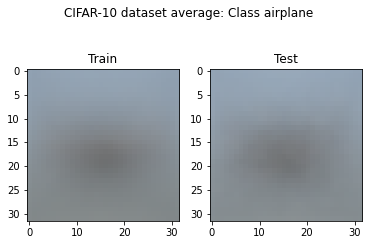

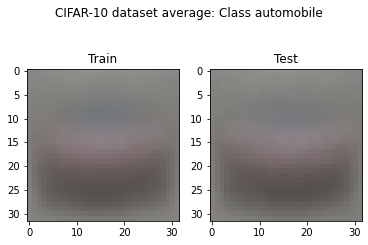

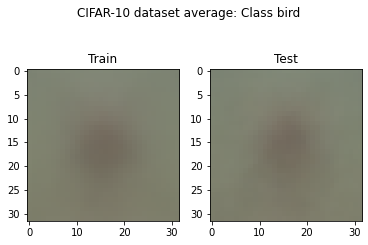

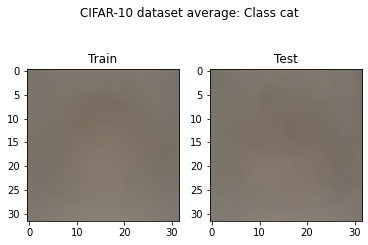

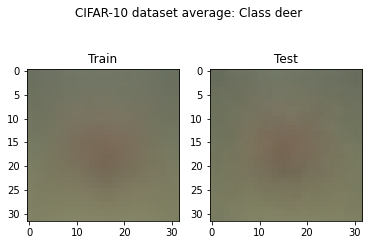

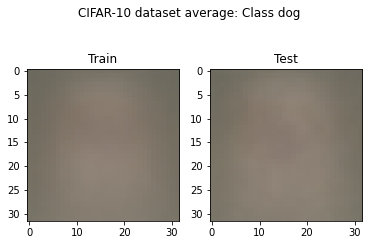

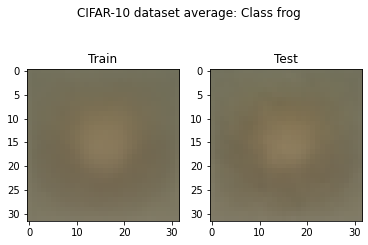

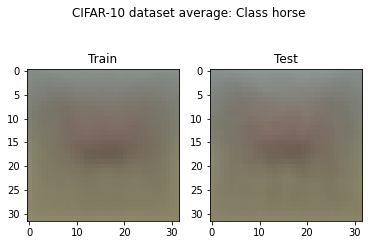

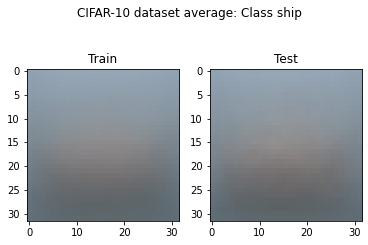

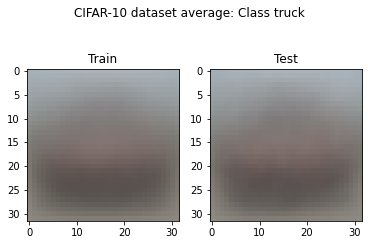

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


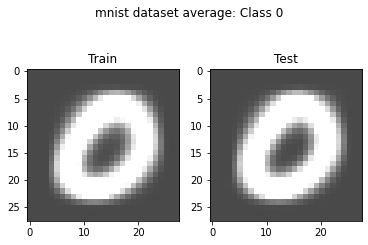

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


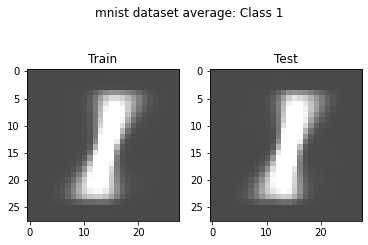

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


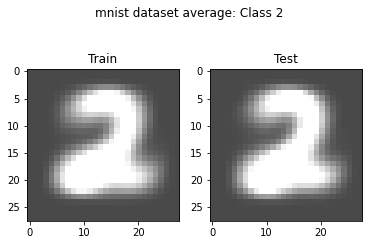

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


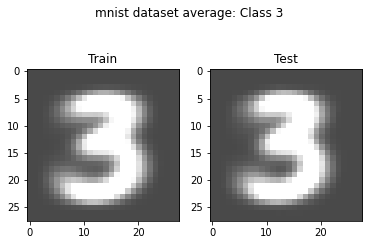

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


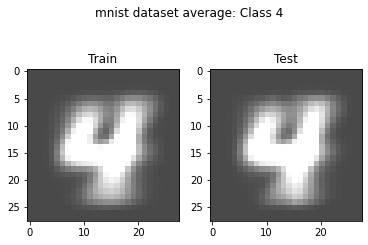

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


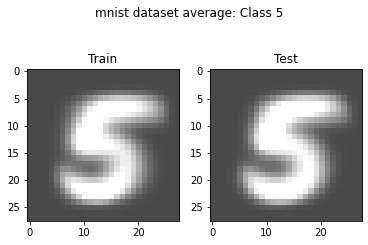

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


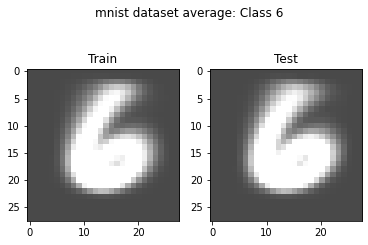

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


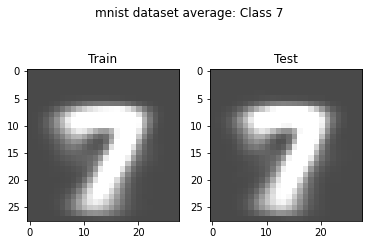

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


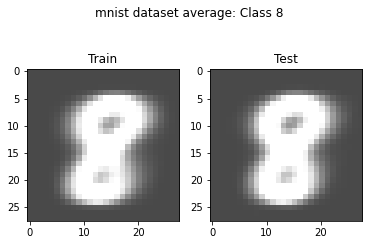

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


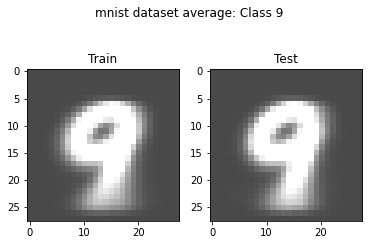

In [13]:
torch.utils.data.DataLoader.num_worker = 0

# building the transforms and data loaders

cifar_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

mnist_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))])

cifar_train = torchvision.datasets.CIFAR10(root='.', train=True,
                                           download=True, transform=cifar_transform)

cifar_train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=1,
                                                 shuffle=True, num_workers=2)

cifar_test = torchvision.datasets.CIFAR10(root='.', train=False,
                                          download=True, transform=cifar_transform)

cifar_test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=1,
                                                shuffle=False, num_workers=2)

mnist_train = torchvision.datasets.MNIST(root='.', train=True,
                                         download=True, transform=mnist_transform)

mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=1,
                                                 shuffle=True, num_workers=2)

mnist_test = torchvision.datasets.MNIST(root='.', train=False,
                                        download=True, transform=mnist_transform)

mnist_test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1,
                                                shuffle=False, num_workers=2)

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

show_average_images(cifar_train_loader, cifar_test_loader, 'CIFAR-10', cifar_labels)
show_average_images(mnist_train_loader, mnist_test_loader, 'mnist', mnist_labels)

# **Answer (2):**
create needed blocks of code (and results) below

In [14]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [15]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [16]:
# train and test functions
def train(epoch, train_loader):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(test_loader):
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [17]:
# Training and testing 
for i in range(1, epochs+1):
  train(i, mnist_train_loader)

# resetting the value of batch size in the DataLoader objects
cifar_train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size,
                                                 shuffle=True, num_workers=2)

cifar_test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size,
                                                shuffle=False, num_workers=2)

mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
                                                 shuffle=True, num_workers=2)

mnist_test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,
                                                shuffle=False, num_workers=2)

test(mnist_test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.181906
Train Epoch: 1 [100/60000 (0%)]	Loss: 0.346138
Train Epoch: 1 [200/60000 (0%)]	Loss: 0.002575
Train Epoch: 1 [300/60000 (0%)]	Loss: 0.000068
Train Epoch: 1 [400/60000 (1%)]	Loss: 0.005181
Train Epoch: 1 [500/60000 (1%)]	Loss: 0.000147
Train Epoch: 1 [600/60000 (1%)]	Loss: 0.002121
Train Epoch: 1 [700/60000 (1%)]	Loss: 2.290035
Train Epoch: 1 [800/60000 (1%)]	Loss: 1.192987
Train Epoch: 1 [900/60000 (2%)]	Loss: 0.028824
Train Epoch: 1 [1000/60000 (2%)]	Loss: 3.458092
Train Epoch: 1 [1100/60000 (2%)]	Loss: 0.011261
Train Epoch: 1 [1200/60000 (2%)]	Loss: 0.000193
Train Epoch: 1 [1300/60000 (2%)]	Loss: 2.566370
Train Epoch: 1 [1400/60000 (2%)]	Loss: 0.002551
Train Epoch: 1 [1500/60000 (2%)]	Loss: 0.104724
Train Epoch: 1 [1600/60000 (3%)]	Loss: 2.149426
Train Epoch: 1 [1700/60000 (3%)]	Loss: 0.005966
Train Epoch: 1 [1800/60000 (3%)]	Loss: 0.076242
Train Epoch: 1 [1900/60000 (3%)]	Loss: 0.000845
Train Epoch: 1 [2000/60000 (3%)]	Loss: 0.638505
Trai

Train Epoch: 1 [16900/60000 (28%)]	Loss: 0.000000
Train Epoch: 1 [17000/60000 (28%)]	Loss: 0.000000
Train Epoch: 1 [17100/60000 (28%)]	Loss: 0.009205
Train Epoch: 1 [17200/60000 (29%)]	Loss: 0.000004
Train Epoch: 1 [17300/60000 (29%)]	Loss: 0.000000
Train Epoch: 1 [17400/60000 (29%)]	Loss: 0.000010
Train Epoch: 1 [17500/60000 (29%)]	Loss: 0.000260
Train Epoch: 1 [17600/60000 (29%)]	Loss: 0.005251
Train Epoch: 1 [17700/60000 (30%)]	Loss: 0.000273
Train Epoch: 1 [17800/60000 (30%)]	Loss: 0.000002
Train Epoch: 1 [17900/60000 (30%)]	Loss: 0.441806
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.026646
Train Epoch: 1 [18100/60000 (30%)]	Loss: 0.000005
Train Epoch: 1 [18200/60000 (30%)]	Loss: 0.000000
Train Epoch: 1 [18300/60000 (30%)]	Loss: 0.001369
Train Epoch: 1 [18400/60000 (31%)]	Loss: 0.000000
Train Epoch: 1 [18500/60000 (31%)]	Loss: 0.000003
Train Epoch: 1 [18600/60000 (31%)]	Loss: 0.000843
Train Epoch: 1 [18700/60000 (31%)]	Loss: 14.929264
Train Epoch: 1 [18800/60000 (31%)]	Loss: 0.000001

Train Epoch: 1 [33600/60000 (56%)]	Loss: 0.038446
Train Epoch: 1 [33700/60000 (56%)]	Loss: 0.001414
Train Epoch: 1 [33800/60000 (56%)]	Loss: 0.000009
Train Epoch: 1 [33900/60000 (56%)]	Loss: 0.583240
Train Epoch: 1 [34000/60000 (57%)]	Loss: 0.032401
Train Epoch: 1 [34100/60000 (57%)]	Loss: 0.001045
Train Epoch: 1 [34200/60000 (57%)]	Loss: 0.646792
Train Epoch: 1 [34300/60000 (57%)]	Loss: 0.000000
Train Epoch: 1 [34400/60000 (57%)]	Loss: 0.000000
Train Epoch: 1 [34500/60000 (58%)]	Loss: 0.000000
Train Epoch: 1 [34600/60000 (58%)]	Loss: 0.512260
Train Epoch: 1 [34700/60000 (58%)]	Loss: 0.000047
Train Epoch: 1 [34800/60000 (58%)]	Loss: 0.002625
Train Epoch: 1 [34900/60000 (58%)]	Loss: 0.000000
Train Epoch: 1 [35000/60000 (58%)]	Loss: 0.001660
Train Epoch: 1 [35100/60000 (58%)]	Loss: 0.002381
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.001400
Train Epoch: 1 [35300/60000 (59%)]	Loss: 0.040504
Train Epoch: 1 [35400/60000 (59%)]	Loss: 0.000000
Train Epoch: 1 [35500/60000 (59%)]	Loss: 0.000001


Train Epoch: 1 [50100/60000 (84%)]	Loss: 0.147559
Train Epoch: 1 [50200/60000 (84%)]	Loss: 0.000003
Train Epoch: 1 [50300/60000 (84%)]	Loss: 4.047657
Train Epoch: 1 [50400/60000 (84%)]	Loss: 0.756006
Train Epoch: 1 [50500/60000 (84%)]	Loss: 0.000000
Train Epoch: 1 [50600/60000 (84%)]	Loss: 4.613030
Train Epoch: 1 [50700/60000 (84%)]	Loss: 0.000586
Train Epoch: 1 [50800/60000 (85%)]	Loss: 0.000774
Train Epoch: 1 [50900/60000 (85%)]	Loss: 0.000006
Train Epoch: 1 [51000/60000 (85%)]	Loss: 0.000000
Train Epoch: 1 [51100/60000 (85%)]	Loss: 0.000000
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.020824
Train Epoch: 1 [51300/60000 (86%)]	Loss: 0.000302
Train Epoch: 1 [51400/60000 (86%)]	Loss: 0.000094
Train Epoch: 1 [51500/60000 (86%)]	Loss: 0.171437
Train Epoch: 1 [51600/60000 (86%)]	Loss: 0.000000
Train Epoch: 1 [51700/60000 (86%)]	Loss: 0.000004
Train Epoch: 1 [51800/60000 (86%)]	Loss: 0.000000
Train Epoch: 1 [51900/60000 (86%)]	Loss: 0.000000
Train Epoch: 1 [52000/60000 (87%)]	Loss: 0.138869


Train Epoch: 2 [7000/60000 (12%)]	Loss: 0.000001
Train Epoch: 2 [7100/60000 (12%)]	Loss: 0.000160
Train Epoch: 2 [7200/60000 (12%)]	Loss: 0.000021
Train Epoch: 2 [7300/60000 (12%)]	Loss: 0.013492
Train Epoch: 2 [7400/60000 (12%)]	Loss: 0.000000
Train Epoch: 2 [7500/60000 (12%)]	Loss: 0.000001
Train Epoch: 2 [7600/60000 (13%)]	Loss: 0.000000
Train Epoch: 2 [7700/60000 (13%)]	Loss: 0.000033
Train Epoch: 2 [7800/60000 (13%)]	Loss: 0.000000
Train Epoch: 2 [7900/60000 (13%)]	Loss: 0.000000
Train Epoch: 2 [8000/60000 (13%)]	Loss: 0.000001
Train Epoch: 2 [8100/60000 (14%)]	Loss: 0.000035
Train Epoch: 2 [8200/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8300/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8400/60000 (14%)]	Loss: 0.001481
Train Epoch: 2 [8500/60000 (14%)]	Loss: 0.000782
Train Epoch: 2 [8600/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8700/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8800/60000 (15%)]	Loss: 0.000000
Train Epoch: 2 [8900/60000 (15%)]	Loss: 0.000025
Train Epoch: 2 [9000

Train Epoch: 2 [23900/60000 (40%)]	Loss: 0.000015
Train Epoch: 2 [24000/60000 (40%)]	Loss: 0.000000
Train Epoch: 2 [24100/60000 (40%)]	Loss: 0.000022
Train Epoch: 2 [24200/60000 (40%)]	Loss: 0.002956
Train Epoch: 2 [24300/60000 (40%)]	Loss: 0.001948
Train Epoch: 2 [24400/60000 (41%)]	Loss: 0.108033
Train Epoch: 2 [24500/60000 (41%)]	Loss: 0.000001
Train Epoch: 2 [24600/60000 (41%)]	Loss: 0.000000
Train Epoch: 2 [24700/60000 (41%)]	Loss: 0.000000
Train Epoch: 2 [24800/60000 (41%)]	Loss: 0.000035
Train Epoch: 2 [24900/60000 (42%)]	Loss: 16.320997
Train Epoch: 2 [25000/60000 (42%)]	Loss: 0.003633
Train Epoch: 2 [25100/60000 (42%)]	Loss: 0.000000
Train Epoch: 2 [25200/60000 (42%)]	Loss: 0.000246
Train Epoch: 2 [25300/60000 (42%)]	Loss: 0.000019
Train Epoch: 2 [25400/60000 (42%)]	Loss: 0.000000
Train Epoch: 2 [25500/60000 (42%)]	Loss: 0.712998
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.000000
Train Epoch: 2 [25700/60000 (43%)]	Loss: 0.000000
Train Epoch: 2 [25800/60000 (43%)]	Loss: 1.056876

Train Epoch: 2 [40400/60000 (67%)]	Loss: 0.011862
Train Epoch: 2 [40500/60000 (68%)]	Loss: 0.000008
Train Epoch: 2 [40600/60000 (68%)]	Loss: 0.000020
Train Epoch: 2 [40700/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [40800/60000 (68%)]	Loss: 0.000001
Train Epoch: 2 [40900/60000 (68%)]	Loss: 0.000100
Train Epoch: 2 [41000/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [41100/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [41200/60000 (69%)]	Loss: 0.000000
Train Epoch: 2 [41300/60000 (69%)]	Loss: 0.158773
Train Epoch: 2 [41400/60000 (69%)]	Loss: 0.000000
Train Epoch: 2 [41500/60000 (69%)]	Loss: 0.001641
Train Epoch: 2 [41600/60000 (69%)]	Loss: 0.000038
Train Epoch: 2 [41700/60000 (70%)]	Loss: 0.000000
Train Epoch: 2 [41800/60000 (70%)]	Loss: 0.000023
Train Epoch: 2 [41900/60000 (70%)]	Loss: 0.000000
Train Epoch: 2 [42000/60000 (70%)]	Loss: 0.008406
Train Epoch: 2 [42100/60000 (70%)]	Loss: 0.000000
Train Epoch: 2 [42200/60000 (70%)]	Loss: 0.000001
Train Epoch: 2 [42300/60000 (70%)]	Loss: 0.000001


Train Epoch: 2 [57200/60000 (95%)]	Loss: 0.000139
Train Epoch: 2 [57300/60000 (96%)]	Loss: 0.000004
Train Epoch: 2 [57400/60000 (96%)]	Loss: 0.000083
Train Epoch: 2 [57500/60000 (96%)]	Loss: 0.000001
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.000000
Train Epoch: 2 [57700/60000 (96%)]	Loss: 0.021044
Train Epoch: 2 [57800/60000 (96%)]	Loss: 0.007290
Train Epoch: 2 [57900/60000 (96%)]	Loss: 0.000000
Train Epoch: 2 [58000/60000 (97%)]	Loss: 0.000000
Train Epoch: 2 [58100/60000 (97%)]	Loss: 0.481279
Train Epoch: 2 [58200/60000 (97%)]	Loss: 0.001415
Train Epoch: 2 [58300/60000 (97%)]	Loss: 0.000000
Train Epoch: 2 [58400/60000 (97%)]	Loss: 0.000013
Train Epoch: 2 [58500/60000 (98%)]	Loss: 0.000244
Train Epoch: 2 [58600/60000 (98%)]	Loss: 0.000000
Train Epoch: 2 [58700/60000 (98%)]	Loss: 1.243733
Train Epoch: 2 [58800/60000 (98%)]	Loss: 0.000046
Train Epoch: 2 [58900/60000 (98%)]	Loss: 0.000000
Train Epoch: 2 [59000/60000 (98%)]	Loss: 0.020346
Train Epoch: 2 [59100/60000 (98%)]	Loss: 0.000000


Train Epoch: 3 [14300/60000 (24%)]	Loss: 0.000000
Train Epoch: 3 [14400/60000 (24%)]	Loss: 0.000002
Train Epoch: 3 [14500/60000 (24%)]	Loss: 0.128327
Train Epoch: 3 [14600/60000 (24%)]	Loss: 0.055752
Train Epoch: 3 [14700/60000 (24%)]	Loss: 10.532531
Train Epoch: 3 [14800/60000 (25%)]	Loss: 0.003917
Train Epoch: 3 [14900/60000 (25%)]	Loss: 0.000000
Train Epoch: 3 [15000/60000 (25%)]	Loss: 0.009951
Train Epoch: 3 [15100/60000 (25%)]	Loss: 0.000000
Train Epoch: 3 [15200/60000 (25%)]	Loss: 3.366386
Train Epoch: 3 [15300/60000 (26%)]	Loss: 0.014733
Train Epoch: 3 [15400/60000 (26%)]	Loss: 0.000053
Train Epoch: 3 [15500/60000 (26%)]	Loss: 0.748842
Train Epoch: 3 [15600/60000 (26%)]	Loss: 0.315537
Train Epoch: 3 [15700/60000 (26%)]	Loss: 6.349082
Train Epoch: 3 [15800/60000 (26%)]	Loss: 0.000000
Train Epoch: 3 [15900/60000 (26%)]	Loss: 0.000000
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.000000
Train Epoch: 3 [16100/60000 (27%)]	Loss: 0.000001
Train Epoch: 3 [16200/60000 (27%)]	Loss: 0.000856

Train Epoch: 3 [31100/60000 (52%)]	Loss: 0.000000
Train Epoch: 3 [31200/60000 (52%)]	Loss: 0.000000
Train Epoch: 3 [31300/60000 (52%)]	Loss: 0.000000
Train Epoch: 3 [31400/60000 (52%)]	Loss: 0.000010
Train Epoch: 3 [31500/60000 (52%)]	Loss: 2.061836
Train Epoch: 3 [31600/60000 (53%)]	Loss: 0.000000
Train Epoch: 3 [31700/60000 (53%)]	Loss: 0.001230
Train Epoch: 3 [31800/60000 (53%)]	Loss: 0.030566
Train Epoch: 3 [31900/60000 (53%)]	Loss: 11.724783
Train Epoch: 3 [32000/60000 (53%)]	Loss: 1.090125
Train Epoch: 3 [32100/60000 (54%)]	Loss: 0.000278
Train Epoch: 3 [32200/60000 (54%)]	Loss: 0.000000
Train Epoch: 3 [32300/60000 (54%)]	Loss: 0.000000
Train Epoch: 3 [32400/60000 (54%)]	Loss: 1.255267
Train Epoch: 3 [32500/60000 (54%)]	Loss: 0.000000
Train Epoch: 3 [32600/60000 (54%)]	Loss: 0.000000
Train Epoch: 3 [32700/60000 (54%)]	Loss: 4.812921
Train Epoch: 3 [32800/60000 (55%)]	Loss: 0.000001
Train Epoch: 3 [32900/60000 (55%)]	Loss: 0.000001
Train Epoch: 3 [33000/60000 (55%)]	Loss: 2.183102

Train Epoch: 3 [47900/60000 (80%)]	Loss: 0.003208
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.000317
Train Epoch: 3 [48100/60000 (80%)]	Loss: 0.000000
Train Epoch: 3 [48200/60000 (80%)]	Loss: 0.000002
Train Epoch: 3 [48300/60000 (80%)]	Loss: 0.000006
Train Epoch: 3 [48400/60000 (81%)]	Loss: 0.000345
Train Epoch: 3 [48500/60000 (81%)]	Loss: 0.000339
Train Epoch: 3 [48600/60000 (81%)]	Loss: 0.000002
Train Epoch: 3 [48700/60000 (81%)]	Loss: 0.000003
Train Epoch: 3 [48800/60000 (81%)]	Loss: 0.000000
Train Epoch: 3 [48900/60000 (82%)]	Loss: 0.000224
Train Epoch: 3 [49000/60000 (82%)]	Loss: 0.000087
Train Epoch: 3 [49100/60000 (82%)]	Loss: 0.000000
Train Epoch: 3 [49200/60000 (82%)]	Loss: 0.000000
Train Epoch: 3 [49300/60000 (82%)]	Loss: 0.000000
Train Epoch: 3 [49400/60000 (82%)]	Loss: 0.000342
Train Epoch: 3 [49500/60000 (82%)]	Loss: 0.000095
Train Epoch: 3 [49600/60000 (83%)]	Loss: 5.146358
Train Epoch: 3 [49700/60000 (83%)]	Loss: 0.000000
Train Epoch: 3 [49800/60000 (83%)]	Loss: 0.002444


Train Epoch: 4 [4700/60000 (8%)]	Loss: 0.000000
Train Epoch: 4 [4800/60000 (8%)]	Loss: 2.668775
Train Epoch: 4 [4900/60000 (8%)]	Loss: 0.000000
Train Epoch: 4 [5000/60000 (8%)]	Loss: 0.001937
Train Epoch: 4 [5100/60000 (8%)]	Loss: 0.000000
Train Epoch: 4 [5200/60000 (9%)]	Loss: 2.205552
Train Epoch: 4 [5300/60000 (9%)]	Loss: 0.000221
Train Epoch: 4 [5400/60000 (9%)]	Loss: 0.000010
Train Epoch: 4 [5500/60000 (9%)]	Loss: 0.000000
Train Epoch: 4 [5600/60000 (9%)]	Loss: 0.000287
Train Epoch: 4 [5700/60000 (10%)]	Loss: 0.000000
Train Epoch: 4 [5800/60000 (10%)]	Loss: 0.000031
Train Epoch: 4 [5900/60000 (10%)]	Loss: 0.000000
Train Epoch: 4 [6000/60000 (10%)]	Loss: 6.588935
Train Epoch: 4 [6100/60000 (10%)]	Loss: 0.000025
Train Epoch: 4 [6200/60000 (10%)]	Loss: 0.000000
Train Epoch: 4 [6300/60000 (10%)]	Loss: 0.000000
Train Epoch: 4 [6400/60000 (11%)]	Loss: 12.630693
Train Epoch: 4 [6500/60000 (11%)]	Loss: 0.000000
Train Epoch: 4 [6600/60000 (11%)]	Loss: 0.000000
Train Epoch: 4 [6700/60000 (1

Train Epoch: 4 [21700/60000 (36%)]	Loss: 0.000000
Train Epoch: 4 [21800/60000 (36%)]	Loss: 0.000001
Train Epoch: 4 [21900/60000 (36%)]	Loss: 0.000000
Train Epoch: 4 [22000/60000 (37%)]	Loss: 0.000001
Train Epoch: 4 [22100/60000 (37%)]	Loss: 0.000000
Train Epoch: 4 [22200/60000 (37%)]	Loss: 0.000985
Train Epoch: 4 [22300/60000 (37%)]	Loss: 0.000000
Train Epoch: 4 [22400/60000 (37%)]	Loss: 0.001376
Train Epoch: 4 [22500/60000 (38%)]	Loss: 0.000000
Train Epoch: 4 [22600/60000 (38%)]	Loss: 0.000000
Train Epoch: 4 [22700/60000 (38%)]	Loss: 0.023539
Train Epoch: 4 [22800/60000 (38%)]	Loss: 0.000000
Train Epoch: 4 [22900/60000 (38%)]	Loss: 3.514243
Train Epoch: 4 [23000/60000 (38%)]	Loss: 0.000012
Train Epoch: 4 [23100/60000 (38%)]	Loss: 0.000000
Train Epoch: 4 [23200/60000 (39%)]	Loss: 34.917747
Train Epoch: 4 [23300/60000 (39%)]	Loss: 0.000000
Train Epoch: 4 [23400/60000 (39%)]	Loss: 0.000000
Train Epoch: 4 [23500/60000 (39%)]	Loss: 0.000010
Train Epoch: 4 [23600/60000 (39%)]	Loss: 0.000000

Train Epoch: 4 [38600/60000 (64%)]	Loss: 0.020273
Train Epoch: 4 [38700/60000 (64%)]	Loss: 0.000003
Train Epoch: 4 [38800/60000 (65%)]	Loss: 0.000272
Train Epoch: 4 [38900/60000 (65%)]	Loss: 0.000000
Train Epoch: 4 [39000/60000 (65%)]	Loss: 0.001947
Train Epoch: 4 [39100/60000 (65%)]	Loss: 0.000000
Train Epoch: 4 [39200/60000 (65%)]	Loss: 0.041682
Train Epoch: 4 [39300/60000 (66%)]	Loss: 0.000000
Train Epoch: 4 [39400/60000 (66%)]	Loss: 2.027759
Train Epoch: 4 [39500/60000 (66%)]	Loss: 14.608105
Train Epoch: 4 [39600/60000 (66%)]	Loss: 0.104248
Train Epoch: 4 [39700/60000 (66%)]	Loss: 0.000000
Train Epoch: 4 [39800/60000 (66%)]	Loss: 0.000000
Train Epoch: 4 [39900/60000 (66%)]	Loss: 0.000000
Train Epoch: 4 [40000/60000 (67%)]	Loss: 0.000000
Train Epoch: 4 [40100/60000 (67%)]	Loss: 0.007145
Train Epoch: 4 [40200/60000 (67%)]	Loss: 0.866566
Train Epoch: 4 [40300/60000 (67%)]	Loss: 11.868985
Train Epoch: 4 [40400/60000 (67%)]	Loss: 0.010957
Train Epoch: 4 [40500/60000 (68%)]	Loss: 0.00129

Train Epoch: 4 [55200/60000 (92%)]	Loss: 0.000000
Train Epoch: 4 [55300/60000 (92%)]	Loss: 0.667682
Train Epoch: 4 [55400/60000 (92%)]	Loss: 2.825525
Train Epoch: 4 [55500/60000 (92%)]	Loss: 0.000000
Train Epoch: 4 [55600/60000 (93%)]	Loss: 0.000000
Train Epoch: 4 [55700/60000 (93%)]	Loss: 0.000021
Train Epoch: 4 [55800/60000 (93%)]	Loss: 3.985240
Train Epoch: 4 [55900/60000 (93%)]	Loss: 0.000129
Train Epoch: 4 [56000/60000 (93%)]	Loss: 0.000000
Train Epoch: 4 [56100/60000 (94%)]	Loss: 3.179904
Train Epoch: 4 [56200/60000 (94%)]	Loss: 0.003197
Train Epoch: 4 [56300/60000 (94%)]	Loss: 0.000234
Train Epoch: 4 [56400/60000 (94%)]	Loss: 0.000000
Train Epoch: 4 [56500/60000 (94%)]	Loss: 0.000000
Train Epoch: 4 [56600/60000 (94%)]	Loss: 0.000000
Train Epoch: 4 [56700/60000 (94%)]	Loss: 0.010730
Train Epoch: 4 [56800/60000 (95%)]	Loss: 1.507086
Train Epoch: 4 [56900/60000 (95%)]	Loss: 0.000042
Train Epoch: 4 [57000/60000 (95%)]	Loss: 0.000000
Train Epoch: 4 [57100/60000 (95%)]	Loss: 0.000000


Train Epoch: 5 [12400/60000 (21%)]	Loss: 0.000106
Train Epoch: 5 [12500/60000 (21%)]	Loss: 0.190206
Train Epoch: 5 [12600/60000 (21%)]	Loss: 0.000087
Train Epoch: 5 [12700/60000 (21%)]	Loss: 0.000013
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.000000
Train Epoch: 5 [12900/60000 (22%)]	Loss: 0.000000
Train Epoch: 5 [13000/60000 (22%)]	Loss: 0.000000
Train Epoch: 5 [13100/60000 (22%)]	Loss: 0.253347
Train Epoch: 5 [13200/60000 (22%)]	Loss: 0.001292
Train Epoch: 5 [13300/60000 (22%)]	Loss: 0.000186
Train Epoch: 5 [13400/60000 (22%)]	Loss: 59.184223
Train Epoch: 5 [13500/60000 (22%)]	Loss: 0.000002
Train Epoch: 5 [13600/60000 (23%)]	Loss: 0.183131
Train Epoch: 5 [13700/60000 (23%)]	Loss: 0.000000
Train Epoch: 5 [13800/60000 (23%)]	Loss: 0.000000
Train Epoch: 5 [13900/60000 (23%)]	Loss: 6.030282
Train Epoch: 5 [14000/60000 (23%)]	Loss: 0.000000
Train Epoch: 5 [14100/60000 (24%)]	Loss: 10.969403
Train Epoch: 5 [14200/60000 (24%)]	Loss: 0.000000
Train Epoch: 5 [14300/60000 (24%)]	Loss: 0.00000

Train Epoch: 5 [28800/60000 (48%)]	Loss: 0.000000
Train Epoch: 5 [28900/60000 (48%)]	Loss: 0.000157
Train Epoch: 5 [29000/60000 (48%)]	Loss: 0.000000
Train Epoch: 5 [29100/60000 (48%)]	Loss: 0.079235
Train Epoch: 5 [29200/60000 (49%)]	Loss: 0.000000
Train Epoch: 5 [29300/60000 (49%)]	Loss: 0.140503
Train Epoch: 5 [29400/60000 (49%)]	Loss: 0.000884
Train Epoch: 5 [29500/60000 (49%)]	Loss: 0.000000
Train Epoch: 5 [29600/60000 (49%)]	Loss: 0.000088
Train Epoch: 5 [29700/60000 (50%)]	Loss: 0.000000
Train Epoch: 5 [29800/60000 (50%)]	Loss: 0.000078
Train Epoch: 5 [29900/60000 (50%)]	Loss: 0.000000
Train Epoch: 5 [30000/60000 (50%)]	Loss: 0.003947
Train Epoch: 5 [30100/60000 (50%)]	Loss: 0.000000
Train Epoch: 5 [30200/60000 (50%)]	Loss: 0.000000
Train Epoch: 5 [30300/60000 (50%)]	Loss: 3.223498
Train Epoch: 5 [30400/60000 (51%)]	Loss: 0.019536
Train Epoch: 5 [30500/60000 (51%)]	Loss: 0.000000
Train Epoch: 5 [30600/60000 (51%)]	Loss: 0.000007
Train Epoch: 5 [30700/60000 (51%)]	Loss: 1.833483


Train Epoch: 5 [45200/60000 (75%)]	Loss: 0.000000
Train Epoch: 5 [45300/60000 (76%)]	Loss: 0.077099
Train Epoch: 5 [45400/60000 (76%)]	Loss: 0.000000
Train Epoch: 5 [45500/60000 (76%)]	Loss: 0.000000
Train Epoch: 5 [45600/60000 (76%)]	Loss: 0.007431
Train Epoch: 5 [45700/60000 (76%)]	Loss: 0.129465
Train Epoch: 5 [45800/60000 (76%)]	Loss: 0.000183
Train Epoch: 5 [45900/60000 (76%)]	Loss: 0.000000
Train Epoch: 5 [46000/60000 (77%)]	Loss: 0.019532
Train Epoch: 5 [46100/60000 (77%)]	Loss: 0.000000
Train Epoch: 5 [46200/60000 (77%)]	Loss: 10.633857
Train Epoch: 5 [46300/60000 (77%)]	Loss: 0.311607
Train Epoch: 5 [46400/60000 (77%)]	Loss: 0.304262
Train Epoch: 5 [46500/60000 (78%)]	Loss: 0.000034
Train Epoch: 5 [46600/60000 (78%)]	Loss: 1.055087
Train Epoch: 5 [46700/60000 (78%)]	Loss: 0.000018
Train Epoch: 5 [46800/60000 (78%)]	Loss: 11.851678
Train Epoch: 5 [46900/60000 (78%)]	Loss: 0.000000
Train Epoch: 5 [47000/60000 (78%)]	Loss: 0.015267
Train Epoch: 5 [47100/60000 (78%)]	Loss: 0.00013

Train Epoch: 6 [2200/60000 (4%)]	Loss: 0.000000
Train Epoch: 6 [2300/60000 (4%)]	Loss: 0.000000
Train Epoch: 6 [2400/60000 (4%)]	Loss: 0.000000
Train Epoch: 6 [2500/60000 (4%)]	Loss: 0.309238
Train Epoch: 6 [2600/60000 (4%)]	Loss: 0.000000
Train Epoch: 6 [2700/60000 (4%)]	Loss: 6.952650
Train Epoch: 6 [2800/60000 (5%)]	Loss: 1.457584
Train Epoch: 6 [2900/60000 (5%)]	Loss: 2.549086
Train Epoch: 6 [3000/60000 (5%)]	Loss: 0.000000
Train Epoch: 6 [3100/60000 (5%)]	Loss: 0.001008
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.003344
Train Epoch: 6 [3300/60000 (6%)]	Loss: 0.000000
Train Epoch: 6 [3400/60000 (6%)]	Loss: 0.000000
Train Epoch: 6 [3500/60000 (6%)]	Loss: 0.000005
Train Epoch: 6 [3600/60000 (6%)]	Loss: 0.000038
Train Epoch: 6 [3700/60000 (6%)]	Loss: 0.003874
Train Epoch: 6 [3800/60000 (6%)]	Loss: 0.000000
Train Epoch: 6 [3900/60000 (6%)]	Loss: 0.109208
Train Epoch: 6 [4000/60000 (7%)]	Loss: 0.003158
Train Epoch: 6 [4100/60000 (7%)]	Loss: 0.000000
Train Epoch: 6 [4200/60000 (7%)]	Loss: 0

Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.028370
Train Epoch: 6 [19300/60000 (32%)]	Loss: 1.009875
Train Epoch: 6 [19400/60000 (32%)]	Loss: 0.000002
Train Epoch: 6 [19500/60000 (32%)]	Loss: 0.000305
Train Epoch: 6 [19600/60000 (33%)]	Loss: 0.000024
Train Epoch: 6 [19700/60000 (33%)]	Loss: 0.000007
Train Epoch: 6 [19800/60000 (33%)]	Loss: 0.000227
Train Epoch: 6 [19900/60000 (33%)]	Loss: 1.552734
Train Epoch: 6 [20000/60000 (33%)]	Loss: 0.000000
Train Epoch: 6 [20100/60000 (34%)]	Loss: 0.000000
Train Epoch: 6 [20200/60000 (34%)]	Loss: 0.000011
Train Epoch: 6 [20300/60000 (34%)]	Loss: 1.609488
Train Epoch: 6 [20400/60000 (34%)]	Loss: 0.637455
Train Epoch: 6 [20500/60000 (34%)]	Loss: 0.000000
Train Epoch: 6 [20600/60000 (34%)]	Loss: 0.000000
Train Epoch: 6 [20700/60000 (34%)]	Loss: 0.000000
Train Epoch: 6 [20800/60000 (35%)]	Loss: 0.000007
Train Epoch: 6 [20900/60000 (35%)]	Loss: 0.037862
Train Epoch: 6 [21000/60000 (35%)]	Loss: 0.000000
Train Epoch: 6 [21100/60000 (35%)]	Loss: 0.000000


Train Epoch: 6 [36000/60000 (60%)]	Loss: 0.000008
Train Epoch: 6 [36100/60000 (60%)]	Loss: 0.000000
Train Epoch: 6 [36200/60000 (60%)]	Loss: 0.000189
Train Epoch: 6 [36300/60000 (60%)]	Loss: 0.000000
Train Epoch: 6 [36400/60000 (61%)]	Loss: 3.336954
Train Epoch: 6 [36500/60000 (61%)]	Loss: 0.351175
Train Epoch: 6 [36600/60000 (61%)]	Loss: 0.063417
Train Epoch: 6 [36700/60000 (61%)]	Loss: 0.088272
Train Epoch: 6 [36800/60000 (61%)]	Loss: 0.000001
Train Epoch: 6 [36900/60000 (62%)]	Loss: 0.000153
Train Epoch: 6 [37000/60000 (62%)]	Loss: 0.007944
Train Epoch: 6 [37100/60000 (62%)]	Loss: 0.000002
Train Epoch: 6 [37200/60000 (62%)]	Loss: 3.696139
Train Epoch: 6 [37300/60000 (62%)]	Loss: 0.000000
Train Epoch: 6 [37400/60000 (62%)]	Loss: 1.745355
Train Epoch: 6 [37500/60000 (62%)]	Loss: 0.000000
Train Epoch: 6 [37600/60000 (63%)]	Loss: 4.677100
Train Epoch: 6 [37700/60000 (63%)]	Loss: 0.000000
Train Epoch: 6 [37800/60000 (63%)]	Loss: 0.000036
Train Epoch: 6 [37900/60000 (63%)]	Loss: 0.000406


Train Epoch: 6 [52800/60000 (88%)]	Loss: 0.000021
Train Epoch: 6 [52900/60000 (88%)]	Loss: 0.040069
Train Epoch: 6 [53000/60000 (88%)]	Loss: 0.000000
Train Epoch: 6 [53100/60000 (88%)]	Loss: 0.002140
Train Epoch: 6 [53200/60000 (89%)]	Loss: 2.566547
Train Epoch: 6 [53300/60000 (89%)]	Loss: 0.000094
Train Epoch: 6 [53400/60000 (89%)]	Loss: 0.060014
Train Epoch: 6 [53500/60000 (89%)]	Loss: 0.000000
Train Epoch: 6 [53600/60000 (89%)]	Loss: 15.599144
Train Epoch: 6 [53700/60000 (90%)]	Loss: 0.000000
Train Epoch: 6 [53800/60000 (90%)]	Loss: 0.000000
Train Epoch: 6 [53900/60000 (90%)]	Loss: 0.000000
Train Epoch: 6 [54000/60000 (90%)]	Loss: 0.000003
Train Epoch: 6 [54100/60000 (90%)]	Loss: 0.000032
Train Epoch: 6 [54200/60000 (90%)]	Loss: 0.000025
Train Epoch: 6 [54300/60000 (90%)]	Loss: 0.000005
Train Epoch: 6 [54400/60000 (91%)]	Loss: 0.000000
Train Epoch: 6 [54500/60000 (91%)]	Loss: 0.001169
Train Epoch: 6 [54600/60000 (91%)]	Loss: 0.000163
Train Epoch: 6 [54700/60000 (91%)]	Loss: 0.000849

Train Epoch: 7 [9500/60000 (16%)]	Loss: 0.002351
Train Epoch: 7 [9600/60000 (16%)]	Loss: 0.000001
Train Epoch: 7 [9700/60000 (16%)]	Loss: 0.001265
Train Epoch: 7 [9800/60000 (16%)]	Loss: 0.000870
Train Epoch: 7 [9900/60000 (16%)]	Loss: 0.000002
Train Epoch: 7 [10000/60000 (17%)]	Loss: 0.000008
Train Epoch: 7 [10100/60000 (17%)]	Loss: 0.012149
Train Epoch: 7 [10200/60000 (17%)]	Loss: 0.000000
Train Epoch: 7 [10300/60000 (17%)]	Loss: 3.049169
Train Epoch: 7 [10400/60000 (17%)]	Loss: 0.000622
Train Epoch: 7 [10500/60000 (18%)]	Loss: 0.770035
Train Epoch: 7 [10600/60000 (18%)]	Loss: 0.000000
Train Epoch: 7 [10700/60000 (18%)]	Loss: 0.000000
Train Epoch: 7 [10800/60000 (18%)]	Loss: 0.000000
Train Epoch: 7 [10900/60000 (18%)]	Loss: 0.000015
Train Epoch: 7 [11000/60000 (18%)]	Loss: 0.000000
Train Epoch: 7 [11100/60000 (18%)]	Loss: 0.000000
Train Epoch: 7 [11200/60000 (19%)]	Loss: 0.000000
Train Epoch: 7 [11300/60000 (19%)]	Loss: 0.000000
Train Epoch: 7 [11400/60000 (19%)]	Loss: 3.199002
Train

Train Epoch: 7 [26300/60000 (44%)]	Loss: 0.000000
Train Epoch: 7 [26400/60000 (44%)]	Loss: 0.000039
Train Epoch: 7 [26500/60000 (44%)]	Loss: 0.001279
Train Epoch: 7 [26600/60000 (44%)]	Loss: 0.000219
Train Epoch: 7 [26700/60000 (44%)]	Loss: 0.000023
Train Epoch: 7 [26800/60000 (45%)]	Loss: 0.000000
Train Epoch: 7 [26900/60000 (45%)]	Loss: 0.000000
Train Epoch: 7 [27000/60000 (45%)]	Loss: 0.000000
Train Epoch: 7 [27100/60000 (45%)]	Loss: 0.000004
Train Epoch: 7 [27200/60000 (45%)]	Loss: 0.000000
Train Epoch: 7 [27300/60000 (46%)]	Loss: 34.984879
Train Epoch: 7 [27400/60000 (46%)]	Loss: 0.043555
Train Epoch: 7 [27500/60000 (46%)]	Loss: 3.367503
Train Epoch: 7 [27600/60000 (46%)]	Loss: 0.000000
Train Epoch: 7 [27700/60000 (46%)]	Loss: 0.000032
Train Epoch: 7 [27800/60000 (46%)]	Loss: 0.000252
Train Epoch: 7 [27900/60000 (46%)]	Loss: 0.000386
Train Epoch: 7 [28000/60000 (47%)]	Loss: 0.000000
Train Epoch: 7 [28100/60000 (47%)]	Loss: 0.000000
Train Epoch: 7 [28200/60000 (47%)]	Loss: 0.000132

Train Epoch: 7 [43200/60000 (72%)]	Loss: 0.000005
Train Epoch: 7 [43300/60000 (72%)]	Loss: 0.000000
Train Epoch: 7 [43400/60000 (72%)]	Loss: 0.000002
Train Epoch: 7 [43500/60000 (72%)]	Loss: 2.030896
Train Epoch: 7 [43600/60000 (73%)]	Loss: 0.000000
Train Epoch: 7 [43700/60000 (73%)]	Loss: 0.000000
Train Epoch: 7 [43800/60000 (73%)]	Loss: 0.000000
Train Epoch: 7 [43900/60000 (73%)]	Loss: 0.000000
Train Epoch: 7 [44000/60000 (73%)]	Loss: 0.004611
Train Epoch: 7 [44100/60000 (74%)]	Loss: 0.000000
Train Epoch: 7 [44200/60000 (74%)]	Loss: 0.001309
Train Epoch: 7 [44300/60000 (74%)]	Loss: 0.000012
Train Epoch: 7 [44400/60000 (74%)]	Loss: 0.000015
Train Epoch: 7 [44500/60000 (74%)]	Loss: 0.000000
Train Epoch: 7 [44600/60000 (74%)]	Loss: 0.010790
Train Epoch: 7 [44700/60000 (74%)]	Loss: 0.000965
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.000000
Train Epoch: 7 [44900/60000 (75%)]	Loss: 0.000439
Train Epoch: 7 [45000/60000 (75%)]	Loss: 3.567692
Train Epoch: 7 [45100/60000 (75%)]	Loss: 0.000006


Train Epoch: 8 [0/60000 (0%)]	Loss: 0.000061
Train Epoch: 8 [100/60000 (0%)]	Loss: 0.000000
Train Epoch: 8 [200/60000 (0%)]	Loss: 0.000003
Train Epoch: 8 [300/60000 (0%)]	Loss: 0.000022
Train Epoch: 8 [400/60000 (1%)]	Loss: 0.000000
Train Epoch: 8 [500/60000 (1%)]	Loss: 0.000272
Train Epoch: 8 [600/60000 (1%)]	Loss: 0.000000
Train Epoch: 8 [700/60000 (1%)]	Loss: 0.000019
Train Epoch: 8 [800/60000 (1%)]	Loss: 0.000000
Train Epoch: 8 [900/60000 (2%)]	Loss: 0.244577
Train Epoch: 8 [1000/60000 (2%)]	Loss: 0.000000
Train Epoch: 8 [1100/60000 (2%)]	Loss: 0.000000
Train Epoch: 8 [1200/60000 (2%)]	Loss: 0.000000
Train Epoch: 8 [1300/60000 (2%)]	Loss: 0.015060
Train Epoch: 8 [1400/60000 (2%)]	Loss: 0.000000
Train Epoch: 8 [1500/60000 (2%)]	Loss: 6.092368
Train Epoch: 8 [1600/60000 (3%)]	Loss: 0.012514
Train Epoch: 8 [1700/60000 (3%)]	Loss: 0.000000
Train Epoch: 8 [1800/60000 (3%)]	Loss: 0.000002
Train Epoch: 8 [1900/60000 (3%)]	Loss: 0.000000
Train Epoch: 8 [2000/60000 (3%)]	Loss: 0.000075
Trai

Train Epoch: 8 [17300/60000 (29%)]	Loss: 0.016156
Train Epoch: 8 [17400/60000 (29%)]	Loss: 0.000000
Train Epoch: 8 [17500/60000 (29%)]	Loss: 0.000000
Train Epoch: 8 [17600/60000 (29%)]	Loss: 0.000004
Train Epoch: 8 [17700/60000 (30%)]	Loss: 0.000042
Train Epoch: 8 [17800/60000 (30%)]	Loss: 0.000210
Train Epoch: 8 [17900/60000 (30%)]	Loss: 1.132093
Train Epoch: 8 [18000/60000 (30%)]	Loss: 0.000000
Train Epoch: 8 [18100/60000 (30%)]	Loss: 0.000000
Train Epoch: 8 [18200/60000 (30%)]	Loss: 0.000000
Train Epoch: 8 [18300/60000 (30%)]	Loss: 0.007124
Train Epoch: 8 [18400/60000 (31%)]	Loss: 0.000002
Train Epoch: 8 [18500/60000 (31%)]	Loss: 0.003583
Train Epoch: 8 [18600/60000 (31%)]	Loss: 0.000000
Train Epoch: 8 [18700/60000 (31%)]	Loss: 0.000000
Train Epoch: 8 [18800/60000 (31%)]	Loss: 0.000000
Train Epoch: 8 [18900/60000 (32%)]	Loss: 0.000008
Train Epoch: 8 [19000/60000 (32%)]	Loss: 0.000000
Train Epoch: 8 [19100/60000 (32%)]	Loss: 0.000002
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.061493


Train Epoch: 8 [34000/60000 (57%)]	Loss: 0.000005
Train Epoch: 8 [34100/60000 (57%)]	Loss: 0.000000
Train Epoch: 8 [34200/60000 (57%)]	Loss: 0.000588
Train Epoch: 8 [34300/60000 (57%)]	Loss: 0.000000
Train Epoch: 8 [34400/60000 (57%)]	Loss: 0.000005
Train Epoch: 8 [34500/60000 (58%)]	Loss: 3.512075
Train Epoch: 8 [34600/60000 (58%)]	Loss: 0.000112
Train Epoch: 8 [34700/60000 (58%)]	Loss: 0.014618
Train Epoch: 8 [34800/60000 (58%)]	Loss: 0.851827
Train Epoch: 8 [34900/60000 (58%)]	Loss: 0.010890
Train Epoch: 8 [35000/60000 (58%)]	Loss: 0.000000
Train Epoch: 8 [35100/60000 (58%)]	Loss: 0.005616
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.001277
Train Epoch: 8 [35300/60000 (59%)]	Loss: 0.000000
Train Epoch: 8 [35400/60000 (59%)]	Loss: 0.004188
Train Epoch: 8 [35500/60000 (59%)]	Loss: 0.000000
Train Epoch: 8 [35600/60000 (59%)]	Loss: 0.000176
Train Epoch: 8 [35700/60000 (60%)]	Loss: 0.000043
Train Epoch: 8 [35800/60000 (60%)]	Loss: 0.000375
Train Epoch: 8 [35900/60000 (60%)]	Loss: 0.000000


Train Epoch: 8 [50500/60000 (84%)]	Loss: 1.330845
Train Epoch: 8 [50600/60000 (84%)]	Loss: 0.005726
Train Epoch: 8 [50700/60000 (84%)]	Loss: 0.000000
Train Epoch: 8 [50800/60000 (85%)]	Loss: 0.021747
Train Epoch: 8 [50900/60000 (85%)]	Loss: 0.000709
Train Epoch: 8 [51000/60000 (85%)]	Loss: 1.229329
Train Epoch: 8 [51100/60000 (85%)]	Loss: 0.000000
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.000453
Train Epoch: 8 [51300/60000 (86%)]	Loss: 2.227525
Train Epoch: 8 [51400/60000 (86%)]	Loss: 0.019152
Train Epoch: 8 [51500/60000 (86%)]	Loss: 0.000025
Train Epoch: 8 [51600/60000 (86%)]	Loss: 4.624509
Train Epoch: 8 [51700/60000 (86%)]	Loss: 0.000003
Train Epoch: 8 [51800/60000 (86%)]	Loss: 0.052412
Train Epoch: 8 [51900/60000 (86%)]	Loss: 0.000090
Train Epoch: 8 [52000/60000 (87%)]	Loss: 0.000009
Train Epoch: 8 [52100/60000 (87%)]	Loss: 0.031616
Train Epoch: 8 [52200/60000 (87%)]	Loss: 0.000000
Train Epoch: 8 [52300/60000 (87%)]	Loss: 0.000349
Train Epoch: 8 [52400/60000 (87%)]	Loss: 0.000002


Train Epoch: 9 [7500/60000 (12%)]	Loss: 0.000011
Train Epoch: 9 [7600/60000 (13%)]	Loss: 0.000000
Train Epoch: 9 [7700/60000 (13%)]	Loss: 5.021888
Train Epoch: 9 [7800/60000 (13%)]	Loss: 0.114949
Train Epoch: 9 [7900/60000 (13%)]	Loss: 0.000000
Train Epoch: 9 [8000/60000 (13%)]	Loss: 0.000000
Train Epoch: 9 [8100/60000 (14%)]	Loss: 0.234813
Train Epoch: 9 [8200/60000 (14%)]	Loss: 0.007714
Train Epoch: 9 [8300/60000 (14%)]	Loss: 2.700817
Train Epoch: 9 [8400/60000 (14%)]	Loss: 0.000000
Train Epoch: 9 [8500/60000 (14%)]	Loss: 0.000089
Train Epoch: 9 [8600/60000 (14%)]	Loss: 0.000000
Train Epoch: 9 [8700/60000 (14%)]	Loss: 0.000000
Train Epoch: 9 [8800/60000 (15%)]	Loss: 0.000000
Train Epoch: 9 [8900/60000 (15%)]	Loss: 0.000813
Train Epoch: 9 [9000/60000 (15%)]	Loss: 0.296350
Train Epoch: 9 [9100/60000 (15%)]	Loss: 0.000027
Train Epoch: 9 [9200/60000 (15%)]	Loss: 0.000000
Train Epoch: 9 [9300/60000 (16%)]	Loss: 0.000000
Train Epoch: 9 [9400/60000 (16%)]	Loss: 0.000000
Train Epoch: 9 [9500

Train Epoch: 9 [24100/60000 (40%)]	Loss: 0.000061
Train Epoch: 9 [24200/60000 (40%)]	Loss: 0.000037
Train Epoch: 9 [24300/60000 (40%)]	Loss: 1.807574
Train Epoch: 9 [24400/60000 (41%)]	Loss: 0.209282
Train Epoch: 9 [24500/60000 (41%)]	Loss: 2.228823
Train Epoch: 9 [24600/60000 (41%)]	Loss: 0.000000
Train Epoch: 9 [24700/60000 (41%)]	Loss: 0.000001
Train Epoch: 9 [24800/60000 (41%)]	Loss: 8.696952
Train Epoch: 9 [24900/60000 (42%)]	Loss: 0.000008
Train Epoch: 9 [25000/60000 (42%)]	Loss: 0.000000
Train Epoch: 9 [25100/60000 (42%)]	Loss: 0.004445
Train Epoch: 9 [25200/60000 (42%)]	Loss: 0.641810
Train Epoch: 9 [25300/60000 (42%)]	Loss: 0.000001
Train Epoch: 9 [25400/60000 (42%)]	Loss: 0.000000
Train Epoch: 9 [25500/60000 (42%)]	Loss: 0.046461
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.008343
Train Epoch: 9 [25700/60000 (43%)]	Loss: 0.000001
Train Epoch: 9 [25800/60000 (43%)]	Loss: 0.000000
Train Epoch: 9 [25900/60000 (43%)]	Loss: 0.000000
Train Epoch: 9 [26000/60000 (43%)]	Loss: 0.747477


Train Epoch: 9 [40800/60000 (68%)]	Loss: 0.000000
Train Epoch: 9 [40900/60000 (68%)]	Loss: 0.000045
Train Epoch: 9 [41000/60000 (68%)]	Loss: 6.522406
Train Epoch: 9 [41100/60000 (68%)]	Loss: 0.006620
Train Epoch: 9 [41200/60000 (69%)]	Loss: 0.000000
Train Epoch: 9 [41300/60000 (69%)]	Loss: 0.000947
Train Epoch: 9 [41400/60000 (69%)]	Loss: 0.000000
Train Epoch: 9 [41500/60000 (69%)]	Loss: 0.000000
Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.000173
Train Epoch: 9 [41700/60000 (70%)]	Loss: 1.996071
Train Epoch: 9 [41800/60000 (70%)]	Loss: 6.510560
Train Epoch: 9 [41900/60000 (70%)]	Loss: 0.892077
Train Epoch: 9 [42000/60000 (70%)]	Loss: 0.000000
Train Epoch: 9 [42100/60000 (70%)]	Loss: 0.000000
Train Epoch: 9 [42200/60000 (70%)]	Loss: 0.000007
Train Epoch: 9 [42300/60000 (70%)]	Loss: 0.000656
Train Epoch: 9 [42400/60000 (71%)]	Loss: 0.000000
Train Epoch: 9 [42500/60000 (71%)]	Loss: 0.762405
Train Epoch: 9 [42600/60000 (71%)]	Loss: 0.000000
Train Epoch: 9 [42700/60000 (71%)]	Loss: 0.028046


Train Epoch: 9 [57600/60000 (96%)]	Loss: 8.745851
Train Epoch: 9 [57700/60000 (96%)]	Loss: 0.000000
Train Epoch: 9 [57800/60000 (96%)]	Loss: 0.147462
Train Epoch: 9 [57900/60000 (96%)]	Loss: 1.955607
Train Epoch: 9 [58000/60000 (97%)]	Loss: 0.000003
Train Epoch: 9 [58100/60000 (97%)]	Loss: 0.098848
Train Epoch: 9 [58200/60000 (97%)]	Loss: 0.000001
Train Epoch: 9 [58300/60000 (97%)]	Loss: 0.000237
Train Epoch: 9 [58400/60000 (97%)]	Loss: 0.003480
Train Epoch: 9 [58500/60000 (98%)]	Loss: 0.000000
Train Epoch: 9 [58600/60000 (98%)]	Loss: 1.321483
Train Epoch: 9 [58700/60000 (98%)]	Loss: 0.000092
Train Epoch: 9 [58800/60000 (98%)]	Loss: 0.000143
Train Epoch: 9 [58900/60000 (98%)]	Loss: 0.000000
Train Epoch: 9 [59000/60000 (98%)]	Loss: 0.000000
Train Epoch: 9 [59100/60000 (98%)]	Loss: 0.617234
Train Epoch: 9 [59200/60000 (99%)]	Loss: 0.039043
Train Epoch: 9 [59300/60000 (99%)]	Loss: 0.000002
Train Epoch: 9 [59400/60000 (99%)]	Loss: 0.000000
Train Epoch: 9 [59500/60000 (99%)]	Loss: 0.000054


Train Epoch: 10 [14500/60000 (24%)]	Loss: 0.000054
Train Epoch: 10 [14600/60000 (24%)]	Loss: 4.608858
Train Epoch: 10 [14700/60000 (24%)]	Loss: 18.651031
Train Epoch: 10 [14800/60000 (25%)]	Loss: 0.000402
Train Epoch: 10 [14900/60000 (25%)]	Loss: 0.000444
Train Epoch: 10 [15000/60000 (25%)]	Loss: 0.000000
Train Epoch: 10 [15100/60000 (25%)]	Loss: 0.000000
Train Epoch: 10 [15200/60000 (25%)]	Loss: 0.938651
Train Epoch: 10 [15300/60000 (26%)]	Loss: 8.262947
Train Epoch: 10 [15400/60000 (26%)]	Loss: 0.000000
Train Epoch: 10 [15500/60000 (26%)]	Loss: 0.001031
Train Epoch: 10 [15600/60000 (26%)]	Loss: 1.268936
Train Epoch: 10 [15700/60000 (26%)]	Loss: 0.000974
Train Epoch: 10 [15800/60000 (26%)]	Loss: 0.000424
Train Epoch: 10 [15900/60000 (26%)]	Loss: 0.000145
Train Epoch: 10 [16000/60000 (27%)]	Loss: 0.000007
Train Epoch: 10 [16100/60000 (27%)]	Loss: 0.000000
Train Epoch: 10 [16200/60000 (27%)]	Loss: 2.016328
Train Epoch: 10 [16300/60000 (27%)]	Loss: 4.108618
Train Epoch: 10 [16400/60000 (

Train Epoch: 10 [30600/60000 (51%)]	Loss: 0.000000
Train Epoch: 10 [30700/60000 (51%)]	Loss: 0.000001
Train Epoch: 10 [30800/60000 (51%)]	Loss: 4.908922
Train Epoch: 10 [30900/60000 (52%)]	Loss: 0.110699
Train Epoch: 10 [31000/60000 (52%)]	Loss: 0.000000
Train Epoch: 10 [31100/60000 (52%)]	Loss: 0.002546
Train Epoch: 10 [31200/60000 (52%)]	Loss: 0.000627
Train Epoch: 10 [31300/60000 (52%)]	Loss: 0.000000
Train Epoch: 10 [31400/60000 (52%)]	Loss: 0.000015
Train Epoch: 10 [31500/60000 (52%)]	Loss: 1.910410
Train Epoch: 10 [31600/60000 (53%)]	Loss: 3.418257
Train Epoch: 10 [31700/60000 (53%)]	Loss: 0.000000
Train Epoch: 10 [31800/60000 (53%)]	Loss: 0.000000
Train Epoch: 10 [31900/60000 (53%)]	Loss: 0.000000
Train Epoch: 10 [32000/60000 (53%)]	Loss: 1.880517
Train Epoch: 10 [32100/60000 (54%)]	Loss: 0.000001
Train Epoch: 10 [32200/60000 (54%)]	Loss: 0.075071
Train Epoch: 10 [32300/60000 (54%)]	Loss: 0.000001
Train Epoch: 10 [32400/60000 (54%)]	Loss: 0.000000
Train Epoch: 10 [32500/60000 (5

Train Epoch: 10 [47100/60000 (78%)]	Loss: 0.147782
Train Epoch: 10 [47200/60000 (79%)]	Loss: 0.003023
Train Epoch: 10 [47300/60000 (79%)]	Loss: 0.000031
Train Epoch: 10 [47400/60000 (79%)]	Loss: 0.032633
Train Epoch: 10 [47500/60000 (79%)]	Loss: 4.914404
Train Epoch: 10 [47600/60000 (79%)]	Loss: 0.001649
Train Epoch: 10 [47700/60000 (80%)]	Loss: 0.000000
Train Epoch: 10 [47800/60000 (80%)]	Loss: 0.000001
Train Epoch: 10 [47900/60000 (80%)]	Loss: 8.727538
Train Epoch: 10 [48000/60000 (80%)]	Loss: 4.923191
Train Epoch: 10 [48100/60000 (80%)]	Loss: 0.070035
Train Epoch: 10 [48200/60000 (80%)]	Loss: 0.000270
Train Epoch: 10 [48300/60000 (80%)]	Loss: 0.000275
Train Epoch: 10 [48400/60000 (81%)]	Loss: 0.000000
Train Epoch: 10 [48500/60000 (81%)]	Loss: 0.000000
Train Epoch: 10 [48600/60000 (81%)]	Loss: 0.000000
Train Epoch: 10 [48700/60000 (81%)]	Loss: 0.000004
Train Epoch: 10 [48800/60000 (81%)]	Loss: 0.000000
Train Epoch: 10 [48900/60000 (82%)]	Loss: 0.000007
Train Epoch: 10 [49000/60000 (8

C:\Users\Karee\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_tensor.py:549: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


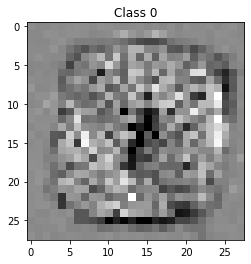

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


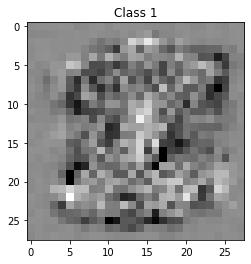

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


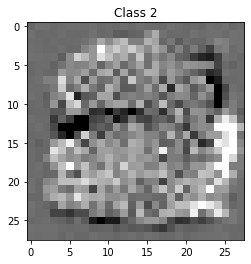

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


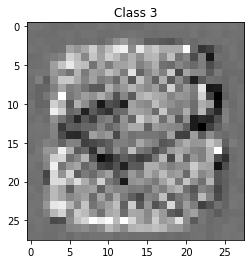

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


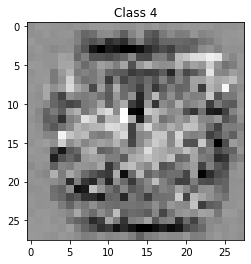

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


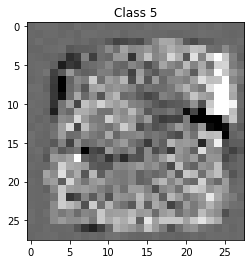

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


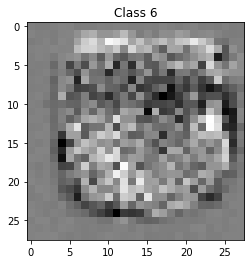

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


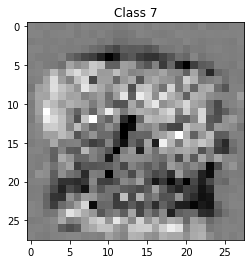

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


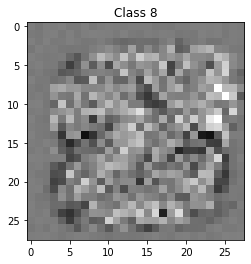

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


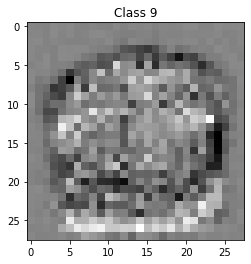

In [18]:
for parameter in network.parameters():
    for i in range(10):
        temp = torchvision.utils.make_grid(parameter[i].resize(28, 28))
        
        temp = temp / 2 + 0.5  # un-normalize
        temp_np = temp.numpy()
        
        plt.figure()
        plt.title("Class " + str(i))
        plt.imshow(np.transpose(temp_np, (1, 2, 0)))
        plt.show()
    
    break # we only need the first model parameter (weights)

In [19]:
limited_net = Net(num_inputs, num_outputs)
limited_optimizer = optim.SGD(network.parameters(), lr=lr)
# train only on 50 examples

def limited_train(epoch, train_loader):
    limited_net.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        
        if batch_idx >= 50:
            break
        
        data, target = Variable(data), Variable(target)
        limited_optimizer.zero_grad()
        output = limited_net(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        limited_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def limited_test(test_loader):
    limited_net.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = limited_net(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [20]:
# we shall use the same options

for i in range(1, epochs+1):
    limited_train(i, mnist_train_loader)

limited_test(mnist_test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.407510
Train Epoch: 2 [0/60000 (0%)]	Loss: 2.406519
Train Epoch: 3 [0/60000 (0%)]	Loss: 2.497919
Train Epoch: 4 [0/60000 (0%)]	Loss: 2.491616
Train Epoch: 5 [0/60000 (0%)]	Loss: 2.422130
Train Epoch: 6 [0/60000 (0%)]	Loss: 2.439598
Train Epoch: 7 [0/60000 (0%)]	Loss: 2.496638
Train Epoch: 8 [0/60000 (0%)]	Loss: 2.403607
Train Epoch: 9 [0/60000 (0%)]	Loss: 2.485586
Train Epoch: 10 [0/60000 (0%)]	Loss: 2.385011

Test set: Average loss: 2.4275, Accuracy: 1264/10000 (13%)



# **Answer (3):**
create needed blocks of code (and results) below

In [21]:
def temp_train(epoch, train_loader):
    '''Trains the data and returns the loss mean for the current epoch'''
    network.train()
    
    loss_epoch = []
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        
        loss_epoch.append(loss.item())
        
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    
    loss_mean_epoch = np.mean(loss_epoch)
    return loss_mean_epoch

In [22]:
class MultiLayerNet(nn.Module):
    '''Class for the required CNN in Q3 containing a new hidden layer with 1000 units in it'''
    
    def __init__(self, num_inputs, num_outputs):
        super(MultiLayerNet, self).__init__()
        self.linear1 = nn.Linear(num_inputs, 1000)
        self.linear2 = nn.Linear(1000, num_outputs)

    def forward(self, x):
        x = x.view(-1, num_inputs)
        x = self.linear1(x)
        x = self.linear2(x)
        x = torch.tanh(x)
        return x

In [24]:
lr = 0.01

train_loss_curves = [[], [], [], []]

for i in range(4):
    print("Learning Rate: " + str(lr), end=2*'\n')
    
    network = MultiLayerNet(28 ** 2, 10)
    optimizer = optim.SGD(network.parameters(), lr=lr)
    
    # training the new model with the current learning rate
    
    for j in range(1, epochs+1):
        curr_loss_avg = temp_train(j, mnist_train_loader)
        train_loss_curves[i].append(curr_loss_avg)

    test(mnist_test_loader)
    
    lr *= 10 # updating the learning rate

Learning Rate: 0.01

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.318342
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.256816
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.196926
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.068732
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.051917
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.168346
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.037984
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.101939
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.019809
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.055806
Train Epoch: 2 [0/60000 (0%)]	Loss: 1.083000
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.969340
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.032206
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.029885
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.096350
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.013401
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.049271
Train Epoch: 2 [44800/60000 (75%)]	Loss: 1.104133
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.977022
Train Epoch: 2 [57600/60000 (96%)]	Loss: 

Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.935624
Train Epoch: 7 [32000/60000 (53%)]	Loss: 1.015661
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.957676
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.870829
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.912069
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.983124
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.930003
Train Epoch: 8 [6400/60000 (11%)]	Loss: 1.040787
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.913922
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.904976
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.926906
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.932241
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.930253
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.905881
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.998827
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.937878
Train Epoch: 9 [0/60000 (0%)]	Loss: 0.916276
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.980395
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.980097
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.987451
Train Epoch:

Train Epoch: 3 [44800/60000 (75%)]	Loss: 2.279055
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.302585
Train Epoch: 3 [57600/60000 (96%)]	Loss: 2.302585
Train Epoch: 4 [0/60000 (0%)]	Loss: 2.302585
Train Epoch: 4 [6400/60000 (11%)]	Loss: 2.302585
Train Epoch: 4 [12800/60000 (21%)]	Loss: 2.302585
Train Epoch: 4 [19200/60000 (32%)]	Loss: 2.284198
Train Epoch: 4 [25600/60000 (43%)]	Loss: 2.284198
Train Epoch: 4 [32000/60000 (53%)]	Loss: 2.302585
Train Epoch: 4 [38400/60000 (64%)]	Loss: 2.302585
Train Epoch: 4 [44800/60000 (75%)]	Loss: 2.302585
Train Epoch: 4 [51200/60000 (85%)]	Loss: 2.302585
Train Epoch: 4 [57600/60000 (96%)]	Loss: 2.302585
Train Epoch: 5 [0/60000 (0%)]	Loss: 2.302585
Train Epoch: 5 [6400/60000 (11%)]	Loss: 2.302585
Train Epoch: 5 [12800/60000 (21%)]	Loss: 2.302585
Train Epoch: 5 [19200/60000 (32%)]	Loss: 2.295953
Train Epoch: 5 [25600/60000 (43%)]	Loss: 2.288061
Train Epoch: 5 [32000/60000 (53%)]	Loss: 2.302585
Train Epoch: 5 [38400/60000 (64%)]	Loss: 2.279055
Train Epoch:

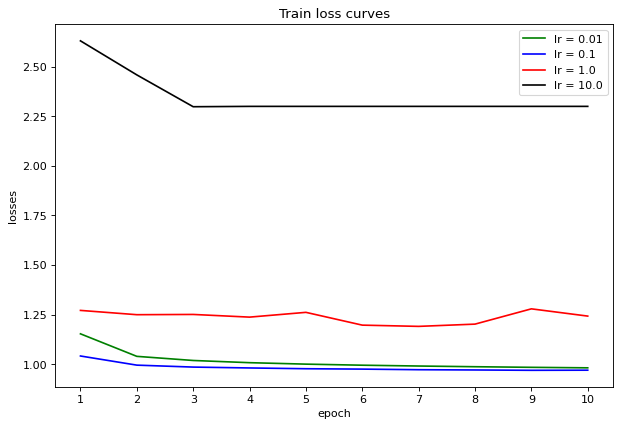

In [39]:
# plotting the loss curves for all four learning rates

colors = ['green', 'blue', 'red', 'black'] # the colors used for different lr in the plot

fg = plt.figure(figsize=(9, 6), dpi=80)
ax = fg.gca()

curr_lr = 0.01

for i in range(4):
    ax.plot(range(1, len(train_loss_curves[i]) + 1), train_loss_curves[i], '-', color=colors[i], label='lr = ' + str(curr_lr))
    curr_lr *= 10

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
plt.title('Train loss curves')

plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(loc="upper right")

plt.show()

# **Answer (4):**
create needed blocks of code (and results) below

In [40]:
dataset = 'cifar10'
lr = 0.01

In [47]:
class ConvNet(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_channels=1):
        super(ConvNet, self).__init__()
        
        # convolution layers
        self.conv1 = nn.Conv2d(num_inputs * num_channels, 16, 5, stride=2)
        self.conv2 = nn.Conv2d(16, 64, 3, stride=1)
        self.conv3 = nn.Conv2d(64, 64, 3, stride=1)
        
        # linear layers
        self.linear1 = nn.Linear(1600, 64)
        self.linear2 = nn.Linear(64, num_outputs)
    
    def forward(self, x):
        x = self.conv1(x)
        x = torch.tanh(x)
        x = self.conv2(x)
        x = torch.tanh(x)
        x = self.conv3(x)
        x = torch.tanh(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.linear1(x)
        x = torch.tanh(x)
        x = self.linear2(x)
        
        return x

In [48]:
epochs = 20
network = ConvNet(num_inputs=1, num_outputs=10, num_channels=3)
optimizer = optim.SGD(network.parameters(), lr=lr)
train_loss_curve = []

# train the new model and save the loss in the above list for the plot

for i in range(1, epochs+1):
    curr_loss_avg = temp_train(i, cifar_train_loader)
    train_loss_curve.append(curr_loss_avg)
    
test(cifar_test_loader)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.320007
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.277331
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.093698
Train Epoch: 1 [19200/50000 (38%)]	Loss: 2.034472
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.000166
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.940306
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.922481
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.854672
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.883694
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.924399
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.818336
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.770732
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.711936
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.813236
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.826684
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.811060
Train Epoch: 3 [0/50000 (0%)]	Loss: 1.492893
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.649398
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.786489
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.819285
Train Epoch: 3 [25

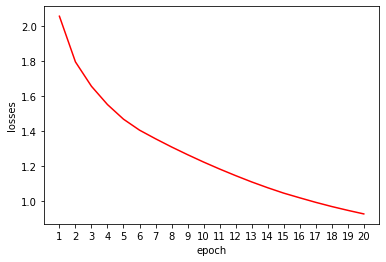

In [49]:
# plotting the loss curve for the training set

fg = plt.figure()
ax = fg.gca()
ax.plot(range(1, len(train_loss_curve) + 1), train_loss_curve, '-', color='red')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))

plt.xlabel('epoch')
plt.ylabel('losses')

plt.show()